# App14

* A complex App with 14 functions.
* There are 2 branches, 2 parallels, 2 cycles, and 1 self-loops in App14

In [1]:
import os
from io import BytesIO
import time
import zipfile
import numpy as np
import boto3
from tqdm import tqdm
from datetime import datetime, timezone
from time import gmtime, strftime
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
client = boto3.client('lambda')

In [3]:
function_prefix='App14'

In [4]:
function_number = 14

In [5]:
# The difference between UTC and local timezone
timezone_offset = -7

## Create Functions of App14

### Function Name List

In [6]:
function_name_list = [function_prefix+'_f'+str(i) for i in range(1, function_number+1)]
print(function_name_list)

['App14_f1', 'App14_f2', 'App14_f3', 'App14_f4', 'App14_f5', 'App14_f6', 'App14_f7', 'App14_f8', 'App14_f9', 'App14_f10', 'App14_f11', 'App14_f12', 'App14_f13', 'App14_f14']


### Send Requests to Create Lambda Functions

In [8]:
function_creation_response = []
for function in function_name_list:
    response = client.create_function(
        FunctionName=function,
        Runtime='python3.7',
        Role='arn:aws:iam::499537426559:role/ServerlessAppPerfOpt',
        Handler='lambda_function.lambda_handler',
        Code={
            'ZipFile': b"PK\x03\x04\x14\x00\x00\x00\x00\x00\xf3s;P\x84\xf0r\x96Z\x00\x00\x00Z\x00\x00\x00\x12\x00\x00\x00lambda_function.pydef lambda_handler(event, context):\n    pass\n    return {\n        'statusCode': 200\n    }\nPK\x03\x04\x14\x00\x00\x00\x00\x00\x05q;P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x13\x00\x00\x00.ipynb_checkpoints/PK\x01\x02\x14\x03\x14\x00\x00\x00\x00\x00\xf3s;P\x84\xf0r\x96Z\x00\x00\x00Z\x00\x00\x00\x12\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xb4\x81\x00\x00\x00\x00lambda_function.pyPK\x01\x02\x14\x03\x14\x00\x00\x00\x00\x00\x05q;P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x13\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\xfdA\x8a\x00\x00\x00.ipynb_checkpoints/PK\x05\x06\x00\x00\x00\x00\x02\x00\x02\x00\x81\x00\x00\x00\xbb\x00\x00\x00\x00\x00"
        },
        Description='Analytical Model Evaluation {}'.format(function),
        Timeout=60,
        MemorySize=128
    )
    function_creation_response.append(response)
    time.sleep(0.1)
print([item['LastUpdateStatus'] for item in function_creation_response])

['Successful', 'Successful', 'Successful', 'Successful', 'Successful', 'Successful', 'Successful', 'Successful', 'Successful', 'Successful', 'Successful', 'Successful', 'Successful', 'Successful']


## Update all Functions in App14

### Update Function Code

In [12]:
functions=[]
for file in os.listdir('functions'):
    path=os.path.abspath(os.path.join(os.path.dirname('__file__'), 'functions/'+file))
    if not file.startswith('.') and os.path.isdir(path):
        functions.append(file)
for function_folder in functions:
    buf = BytesIO()
    with zipfile.ZipFile(buf, 'w') as z:
        for file in os.listdir('functions/'+function_folder):
            z.write(os.path.abspath(os.path.join(os.path.dirname('__file__'), 'functions/{}/{}'.format(function_folder,file))), os.path.basename(os.path.join(os.path.dirname('__file__'), 'functions/{}/{}'.format(function_folder,file))))
    buf.seek(0)
    pkg = buf.read()
    client.update_function_code(FunctionName='{}_{}'.format(function_prefix, function_folder),ZipFile=pkg)

### Update Function Memory Configuration
* Available Memory Configurations: 128, 192, 256, 320, 384, 448, 512, 576, 640, 704, 768, 832, 896, 960, 1024, 1088, 1152, 1216, 1280, 1344, 1408, 1472, 1536, 1600, 1664, 1728, 1792, 1856, 1920, 1984, 2048, 2112, 2176, 2240, 2304, 2368, 2432, 2496, 2560, 2624, 2688, 2752, 2816, 2880, 2944, 3008


In [7]:
mem_config_list={
    'f1':1536,
    'f2':1792,
    'f3':576,
    'f4':2240,
    'f5':896,
    'f6':1728,
    'f7':128,
    'f8':128,
    'f9':256,
    'f10':320,
    'f11':1920,
    'f12':1984,
    'f13':1088,
    'f14':640
}

In [15]:
for function in mem_config_list.keys():
    client.update_function_configuration(FunctionName='{}_{}'.format(function_prefix, function), MemorySize=mem_config_list[function])

## Execute the Application

In [16]:
sfn_client = boto3.client('stepfunctions')

In [17]:
stateMachineArn='arn:aws:states:us-east-2:499537426559:stateMachine:App14'

### Test run

In [19]:
sfn_client.start_execution(
    stateMachineArn=stateMachineArn,
    input="{\"para1\":96, \"para2\":[1,2,3,4,100], \"para3\":[1,100], \"para4\":64, \"para5\":[1,2,100]}"
)

{'executionArn': 'arn:aws:states:us-east-2:499537426559:express:App14:c2b70249-e3a8-433c-b9c7-b1433dc4f398:5cf96cb3-c3b1-40ca-8207-f6909d5d1ca0',
 'startDate': datetime.datetime(2020, 1, 29, 20, 38, 52, 312000, tzinfo=tzlocal()),
 'ResponseMetadata': {'RequestId': 'b077c6df-da6d-4a3a-9c43-5385bc4c3da4',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'b077c6df-da6d-4a3a-9c43-5385bc4c3da4',
   'content-type': 'application/x-amz-json-1.0',
   'content-length': '173'},
  'RetryAttempts': 0}}

### Execute App14

* Execute App14 for 5 periods.
* Execute App14 for 720 times in each exuection period
* The interval between executions is 10 seconds.
* The interval between each execution periods is 2 hours (7200 seconds).

In [23]:
np.random.seed(128)

In [24]:
for period in range(1, 6):
    print('Execution Period {} Timestamp: {} UTC: {}'.format(period,time.time(),strftime("%d %b %Y %H:%M:%S +0000", gmtime())))
    time.sleep(1)
    for i in tqdm(range(720)):
        time.sleep(10)
        input_str="{"+ "\"para1\":{}, \"para2\":{}, \"para3\":{}, \"para4\":{}, \"para5\":{}".format(
            np.random.randint(1, 101),
            list(np.random.randint(1, 101, 20)), 
            list(np.random.randint(1, 101, 20)),
            np.random.randint(1, 101),
            list(np.random.randint(1, 101, 20))
        ) +"}"
        sfn_client.start_execution(
            stateMachineArn=stateMachineArn,
            input=input_str
        )
    if(period!=5):
        time.sleep(7200)

Execution Period 1 Timestamp: 1580355679.895779 UTC: 30 Jan 2020 03:41:19 +0000


100%|██████████| 720/720 [2:02:19<00:00, 10.19s/it]  


Execution Period 2 Timestamp: 1580370220.2975037 UTC: 30 Jan 2020 07:43:40 +0000


100%|██████████| 720/720 [2:02:18<00:00, 10.19s/it]  


Execution Period 3 Timestamp: 1580384759.6063807 UTC: 30 Jan 2020 11:45:59 +0000


100%|██████████| 720/720 [2:02:17<00:00, 10.19s/it]  


Execution Period 4 Timestamp: 1580399297.7505615 UTC: 30 Jan 2020 15:48:17 +0000


100%|██████████| 720/720 [2:02:20<00:00, 10.19s/it]  


Execution Period 5 Timestamp: 1580413838.979376 UTC: 30 Jan 2020 19:50:38 +0000


100%|██████████| 720/720 [2:02:24<00:00, 10.20s/it]  


## CloudWatch Logs

In [26]:
logclient = boto3.client('logs')

### Query App14 Step Functions Logs

#### Define Timestamps

In [13]:
startTime_sfn_App14=int(datetime.timestamp(datetime(year=2020,month=1,day=30,hour=3,minute=41,second=16,tzinfo=timezone.utc)))
endTime_sfn_App14=int(datetime.timestamp(datetime(year=2020,month=1,day=30,hour=21,minute=54,second=0,tzinfo=timezone.utc)))

In [14]:
execution_start_index = [60 + 720*i for i in range(5)]
execution_end_index = [item + 600 for item in execution_start_index]

In [15]:
execution_start_index

[60, 780, 1500, 2220, 2940]

In [16]:
execution_end_index

[660, 1380, 2100, 2820, 3540]

#### Query CloudWatch Logs

In [31]:
query_sfn_App14 = logclient.start_query(
    logGroupName='/aws/states/{}-Logs'.format('App14'),
    queryString="fields type, @timestamp| filter type = 'ExecutionStarted' or type = 'ExecutionSucceeded' | sort id desc",
    startTime=startTime_sfn_App14,
    endTime=endTime_sfn_App14,
    limit = 10000
)

In [32]:
query_results_sfn_App14 = logclient.get_query_results(
    queryId=query_sfn_App14['queryId']
)

In [33]:
App14_starttimestamp=np.sort([datetime.timestamp(datetime.strptime(item[1]['value'], '%Y-%m-%d %H:%M:%S.%f'))+timezone_offset*3600 for item in query_results_sfn_App14['results'] if item[0]['value']=='ExecutionStarted'])
App14_endtimestamp=np.sort([datetime.timestamp(datetime.strptime(item[1]['value'], '%Y-%m-%d %H:%M:%S.%f'))+timezone_offset*3600 for item in query_results_sfn_App14['results'] if item[0]['value']=='ExecutionSucceeded'])

In [34]:
pd.DataFrame({'Start': App14_starttimestamp, 'End':App14_endtimestamp}).to_csv('App14_SFN_Logs.csv', index=False)

In [11]:
App14_sfn_logs = pd.read_csv('App14_SFN_Logs.csv', error_bad_lines=False, warn_bad_lines=False,low_memory=False)

In [36]:
App14_sfn_logs.shape

(3600, 2)

In [17]:
App14_sfn_logs_trimmed = pd.DataFrame()
for i in range(5):
    App14_sfn_logs_trimmed = App14_sfn_logs_trimmed.append(App14_sfn_logs[execution_start_index[i] : execution_end_index[i]])

In [38]:
App14_sfn_logs_trimmed.shape

(3000, 2)

In [18]:
App14_duration=pd.DataFrame((App14_sfn_logs_trimmed['End']-App14_sfn_logs_trimmed['Start'])*1000, columns=['Duration'])
App14_duration.to_csv('App14_Duration_AWS.csv', index=True)
App14_duration = pd.read_csv('App14_Duration_AWS.csv', error_bad_lines=False, warn_bad_lines=False,low_memory=False, index_col=0)

#### End-to-end Response Time Distribution

In [19]:
print('Number of Executions: ', len(App14_duration['Duration']))
App14_avg_duration_aws = np.mean(App14_duration['Duration'])
print('Average Duration Reported by Step Function: ', App14_avg_duration_aws, 'ms')
print('Standard Deviation of Duration Reported by Step Function: ', np.std(App14_duration['Duration']), 'ms')

Number of Executions:  3000
Average Duration Reported by Step Function:  3235.7523324489594 ms
Standard Deviation of Duration Reported by Step Function:  668.7047782725692 ms


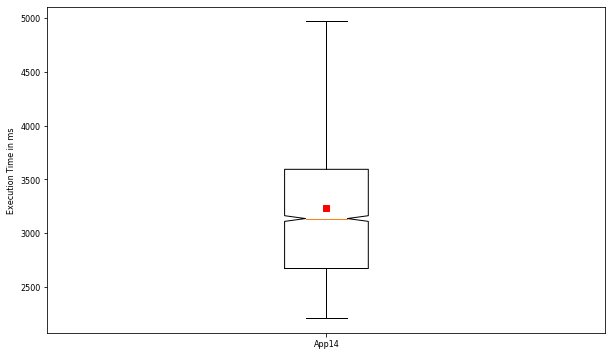

In [41]:
plt.rc('font', size=8)
plt.rc('axes', titlesize=6)
plt.rc('axes', labelsize=8)
fig, ax = plt.subplots(figsize=(10, 6))
App14_ExecutionTime_Bplot = ax.boxplot(App14_duration['Duration'], notch=True, patch_artist=False, labels=['App14'], showfliers=False, showmeans=False)
ax.plot(np.average(App14_ExecutionTime_Bplot['medians'][0].get_xdata()), np.average(App14_duration['Duration']),color='red', marker='s', markeredgecolor='red')
ax.set_ylabel('Execution Time in ms')
plt.show()

### Query App14 Lambda Function Logs

#### Functions for parsing Logs

In [42]:
def lambda_report_log_to_dict(log):
    res={}
    lis=[item.split(': ') for item in log[1]['value'].split('\t')]
    res['RequestId']=lis[0][1]
    res['Duration']=float(lis[1][1].split(' ')[0])
    res['Billed Duration']=int(lis[2][1].split(' ')[0])
    res['Memory Size']=int(lis[3][1].split(' ')[0])
    res['Max Memory Used']=int(lis[4][1].split(' ')[0])
    res['UTCTimestamp'] = time.mktime(datetime.strptime(log[0]['value'], "%Y-%m-%d %H:%M:%S.%f").timetuple()) +timezone_offset*3600
    return res

In [43]:
query_lambda = []
for function in function_name_list:
    query_lambda.append(logclient.start_query(
        logGroupName='/aws/lambda/{}'.format(function),
        queryString="fields @timestamp, @message| filter @message like 'REPORT'| sort @timestamp asc",
        startTime=startTime_sfn_App14,
        endTime=endTime_sfn_App14,
        limit=10000
        ))
    time.sleep(4)
time.sleep(10)

In [44]:
query_lambda_results = []
for q in query_lambda:
    query_lambda_results.append(logclient.get_query_results(
        queryId=q['queryId']
    ))
    time.sleep(4)

In [45]:
App14_lambda_logs = {'f'+str(i):None for i in range(1, function_number+1)}
for i in range(1, function_number+1):
    App14_lambda_logs['f'+str(i)] = [lambda_report_log_to_dict(item) for item in query_lambda_results[i-1]['results']]
    for item in App14_lambda_logs['f'+str(i)]:
        item['Function']='f'+str(i)

#### Convert Logs into DataFrame and Save as CSV

In [46]:
App14_Lambda_Logs=pd.DataFrame()
for i in range(1, function_number+1):
    App14_Lambda_Logs = App14_Lambda_Logs.append(pd.DataFrame(App14_lambda_logs['f'+str(i)]))
App14_Lambda_Logs.index=range(App14_Lambda_Logs.shape[0])
App14_Lambda_Logs=App14_Lambda_Logs[['Function', 'Memory Size', 'Max Memory Used', 'Duration', 'Billed Duration', 'UTCTimestamp', 'RequestId']]
App14_Lambda_Logs.to_csv('App14_Lambda_Logs.csv',index=False)

In [27]:
App14_Lambda_Logs = pd.read_csv('App14_Lambda_Logs.csv', error_bad_lines=False, warn_bad_lines=False,low_memory=False)
App14_Lambda_Logs.columns = ['Function', 'Memory_Size', 'Max_Memory_Used', 'Duration', 'Billed_Duration', 'UTCTimestamp', 'RequestId']

In [28]:
App14_Lambda_Logs.head()

,Function,Memory_Size,Max_Memory_Used,Duration,Billed_Duration,UTCTimestamp,RequestId
0,f1,1536,59,407.36,500,1.580356e+09,5913c347-b5fa-4b9e-aa23-bf8b9d07a700
1,f1,1536,59,419.17,500,1.580356e+09,a14d7892-564b-4bf1-80fe-e88c551cf9e3
2,f1,1536,59,624.24,700,1.580356e+09,31ab284d-7d45-4187-aa5b-5642d8e46b4e
3,f1,1536,59,710.40,800,1.580356e+09,92a54c3d-4316-4f83-a973-24b2e72c60e0
4,f1,1536,59,716.98,800,1.580356e+09,8b285ce7-899b-4087-bd45-8c4c1496bb23


#### Trim Lambda Function Logs

In [29]:
execution_start_timestamp = [App14_sfn_logs['Start'][i] for i in execution_start_index]
execution_end_timestamp = [App14_sfn_logs['End'][i] for i in execution_end_index]

#### Average Duration and Number of Executions of Functions

In [30]:
function_duration_dict = {}
function_ne_dict = {}
for i in range(1,function_number+1):
    temp_df = pd.DataFrame()
    for j in range(len(execution_start_timestamp)):
        temp_df = temp_df.append(App14_Lambda_Logs.query("Function=='{}' and UTCTimestamp>{} and UTCTimestamp<{}".format('f'+str(i), execution_start_timestamp[j]+1, execution_end_timestamp[j]-1)))
    function_duration_dict['f'+str(i)] = temp_df['Duration'].mean()
    function_ne_dict['f'+str(i)]  = temp_df.shape[0]

In [31]:
print('Average Duration of Functions:')
print(function_duration_dict)
print('Aboslute Number of Executions of Functions Reported by AWS:')
print(function_ne_dict)
print('Relative Number of Executions of Functions Reported by AWS:')
function_ne_dict_relative = {func:function_ne_dict[func]/function_ne_dict['f1'] for func in function_ne_dict.keys()}
print(function_ne_dict_relative)

Average Duration of Functions:
{'f1': 753.2851566666666, 'f2': 204.29070666666667, 'f3': 524.4368215892055, 'f4': 827.8588409854423, 'f5': 205.21185855263158, 'f6': 509.5000658879904, 'f7': 346.4966170608557, 'f8': 237.66809666666668, 'f9': 162.31541055718475, 'f10': 365.88409539473685, 'f11': 1002.8742775041052, 'f12': 789.5428243021348, 'f13': 377.3143864678899, 'f14': 231.9045553643144}
Aboslute Number of Executions of Functions Reported by AWS:
{'f1': 3000, 'f2': 3000, 'f3': 3335, 'f4': 1786, 'f5': 1216, 'f6': 3339, 'f7': 3763, 'f8': 3000, 'f9': 2728, 'f10': 608, 'f11': 1218, 'f12': 1218, 'f13': 1744, 'f14': 1743}
Relative Number of Executions of Functions Reported by AWS:
{'f1': 1.0, 'f2': 1.0, 'f3': 1.1116666666666666, 'f4': 0.5953333333333334, 'f5': 0.4053333333333333, 'f6': 1.113, 'f7': 1.2543333333333333, 'f8': 1.0, 'f9': 0.9093333333333333, 'f10': 0.20266666666666666, 'f11': 0.406, 'f12': 0.406, 'f13': 0.5813333333333334, 'f14': 0.581}


#### Cost per 1 Million Executions Distribution

In [53]:
pricing_model={0:0, 128:0.000000208,192:0.000000313,256:0.000000417,320:0.000000521,384:0.000000625,448:0.000000729,512:0.000000834,576:0.000000938,640:0.000001042,704:0.000001146,768:0.00000125,832:0.000001354,896:0.000001459,960:0.000001563,1024:0.000001667,1088:0.000001771,1152:0.000001875,1216:0.00000198,1280:0.000002084,1344:0.000002188,1408:0.000002292,1472:0.000002396,1536:0.000002501,1600:0.000002605,1664:0.000002709,1728:0.000002813,1792:0.000002917,1856:0.000003021,1920:0.000003126,1984:0.00000323,2048:0.000003334,2112:0.000003438,2176:0.000003542,2240:0.000003647,2304:0.000003751,2368:0.000003855,2432:0.000003959,2496:0.000004063,2560:0.000004168,2624:0.000004272,2688:0.000004376,2752:0.00000448,2816:0.000004584,2880:0.000004688,2944:0.000004793,3008:0.000004897}

In [54]:
App14_avg_cost_aws_df = pd.DataFrame(columns=['1M_Exe_Cost'])
for i in App14_sfn_logs_trimmed.index:
    temp_df = App14_Lambda_Logs.query("UTCTimestamp>={} and UTCTimestamp<={}".format(App14_sfn_logs_trimmed['Start'][i]-1, App14_sfn_logs_trimmed['End'][i]+1))
    cost = 0
    for index, row in temp_df.iterrows():
        cost += pricing_model[row['Memory_Size']]*row['Billed_Duration']/100 + 0.0000002
    App14_avg_cost_aws_df.loc[i] = [cost*1000000]
App14_avg_cost_aws_df.to_csv('App14_Cost_AWS.csv', index=True)
App14_avg_cost_aws_df = pd.read_csv('App14_Cost_AWS.csv', error_bad_lines=False, warn_bad_lines=False,low_memory=False, index_col=0)

In [55]:
print('Number of Executions: ', len(App14_avg_cost_aws_df))
App14_avg_cost_aws =  np.mean(App14_avg_cost_aws_df['1M_Exe_Cost'])
print('Average Cost per 1 Million Executions Reported by AWS: ', App14_avg_cost_aws, 'USD')
print('Standard Deviation of Average Cost per 1 Million Executions Reported by AWS: ', np.std(App14_avg_cost_aws_df['1M_Exe_Cost']), 'USD')

Number of Executions:  3000
Average Cost per 1 Million Executions Reported by AWS:  109.05882933333334 USD
Standard Deviation of Average Cost per 1 Million Executions Reported by AWS:  25.692638812460263 USD


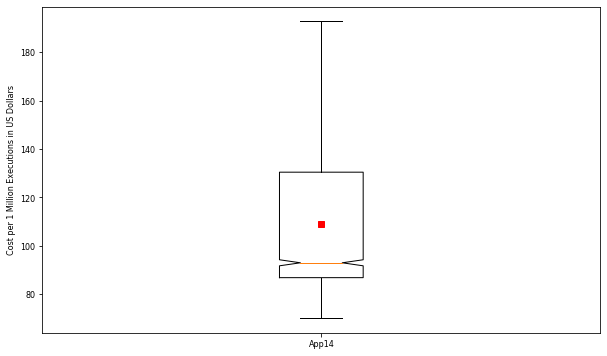

In [56]:
plt.rc('font', size=8)
plt.rc('axes', titlesize=6)
plt.rc('axes', labelsize=8)
fig, ax = plt.subplots(figsize=(10, 6))
App14_Cost_Bplot = ax.boxplot(App14_avg_cost_aws_df['1M_Exe_Cost'], notch=True, patch_artist=False, labels=['App14'], showfliers=False, showmeans=False)
ax.plot(np.average(App14_Cost_Bplot['medians'][0].get_xdata()), np.average(App14_avg_cost_aws_df['1M_Exe_Cost']),color='red', marker='s', markeredgecolor='red')
ax.set_ylabel('Cost per 1 Million Executions in US Dollars')
plt.show()

## Analytical Model

In [21]:
import sys
sys.path.append('../../../source/ServerlessAppPerfCostMdlOpt')
import networkx as nx
import itertools
import warnings
warnings.filterwarnings("ignore")
from ServerlessAppWorkflow import ServerlessAppWorkflow
from AppGenerator import AppGenerator
from PerfOpt import PerfOpt

### Define App Orchestration

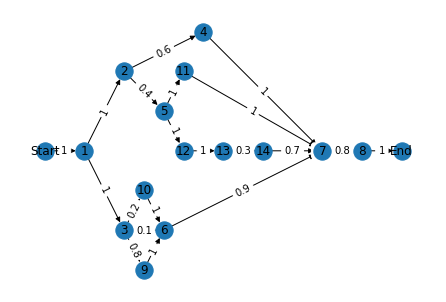

In [32]:
App14_G = nx.DiGraph()
App14_G.add_node('Start', pos=(0, 1))
App14_G.add_node(1, pos=(1, 1), mem = mem_config_list['f1'], rt = function_duration_dict['f1'])
App14_G.add_node(2, pos=(2, 2), mem = mem_config_list['f2'], rt = function_duration_dict['f2'])
App14_G.add_node(3, pos=(2, 0), mem = mem_config_list['f3'], rt = function_duration_dict['f3'])
App14_G.add_node(9, pos=(2.5, -0.5), mem = mem_config_list['f9'], rt = function_duration_dict['f9'])
App14_G.add_node(10, pos=(2.5, 0.5), mem = mem_config_list['f10'], rt = function_duration_dict['f10'])
App14_G.add_node(4, pos=(4, 2.5), mem = mem_config_list['f4'], rt = function_duration_dict['f4'])
App14_G.add_node(5, pos=(3, 1.5), mem = mem_config_list['f5'], rt = function_duration_dict['f5'])
App14_G.add_node(11, pos=(3.5, 2), mem = mem_config_list['f11'], rt = function_duration_dict['f11'])
App14_G.add_node(12, pos=(3.5, 1), mem = mem_config_list['f12'], rt = function_duration_dict['f12'])
App14_G.add_node(13, pos=(4.5, 1), mem = mem_config_list['f13'], rt = function_duration_dict['f13'])
App14_G.add_node(14, pos=(5.5, 1), mem = mem_config_list['f14'], rt = function_duration_dict['f14'])
App14_G.add_node(6, pos=(3, 0), mem = mem_config_list['f6'], rt = function_duration_dict['f6'])
App14_G.add_node(7, pos=(7, 1), mem = mem_config_list['f7'], rt = function_duration_dict['f7'])
App14_G.add_node(8, pos=(8, 1), mem = mem_config_list['f8'], rt = function_duration_dict['f8'])
App14_G.add_node('End', pos=(9, 1))
App14_G.add_weighted_edges_from([(1, 2, 1),(1, 3, 1),(2, 4, 0.6),(2, 5, 0.4),(4, 7, 1),(5, 11, 1),(5, 12, 1),(11, 7, 1),(12, 13, 1),(13, 14, 1),(14, 13, 0.3),(14, 7, 0.7),(3, 9, 0.8),(3, 10, 0.2),(9, 6, 1),(10, 6, 1), (6, 7, 0.9), (6, 3, 0.1), (7, 8, 0.8),(7, 7, 0.2)])
App14_G.add_weighted_edges_from([('Start', 1, 1), (8, 'End', 1)])
pos_App14_G = nx.get_node_attributes(App14_G, 'pos')
nx.draw(App14_G, pos_App14_G, with_labels=True)
labels_App14_G = nx.get_edge_attributes(App14_G, 'weight')
nx.draw_networkx_edge_labels(App14_G, pos_App14_G, edge_labels=labels_App14_G)
pos_higher_offset_App14_G = {}
for k, v in pos_App14_G.items():
    pos_higher_offset_App14_G[k] = (v[0], v[1] + 0.15)
plt.savefig('App14_G.png')
plt.show()

In [63]:
App14 = ServerlessAppWorkflow(G=App14_G.copy(), delayType='SFN')
App14.update_NE()
print('Relative Number of Executions of Functions Reported by Model:')
print(App14.ne)
App14cost = App14.get_avg_cost()
App14.get_simple_dag()
App14rt = App14.get_avg_rt()
print("Average End-to-end Response Time Reported by Model: {}".format(App14rt))
print("Average Cost per 1 Million Executions Reported by Model: {}".format(App14cost))
rt_accuracy = 100-(App14rt-App14_avg_duration_aws)/App14rt*100
print("Accuracy of the End-to-end Response Time Modeling: ", rt_accuracy)
cost_accuracy = 100-(App14cost-App14_avg_cost_aws)/App14rt*100
print("Accuracy of the Cost Modeling: ", cost_accuracy)

Relative Number of Executions of Functions Reported by Model:
{'Start': 0, 1: 1, 2: 1, 3: 1.1111111111111112, 9: 0.888888888888889, 10: 0.22222222222222224, 4: 0.6, 5: 0.4, 11: 0.4, 12: 0.4, 13: 0.5714285714285715, 14: 0.5714285714285715, 6: 1.1111111111111112, 7: 1.25, 8: 1, 'End': 0}
Average End-to-end Response Time Reported by Model: 3280.655813420972
Average Cost per 1 Million Executions Reported by Model: 110.10863492063493
Accuracy of the End-to-end Response Time Modeling:  98.6312651029006
Accuracy of the Cost Modeling:  99.96800013024814


In [67]:
with open('results.json', 'w', encoding='utf-8') as f:
    json.dump({"RT_Model":App14rt, "RT_Accuracy":rt_accuracy,
               "Cost_Model":App14cost, "Cost_Accuracy":cost_accuracy
              }, f, ensure_ascii=False, indent=4)

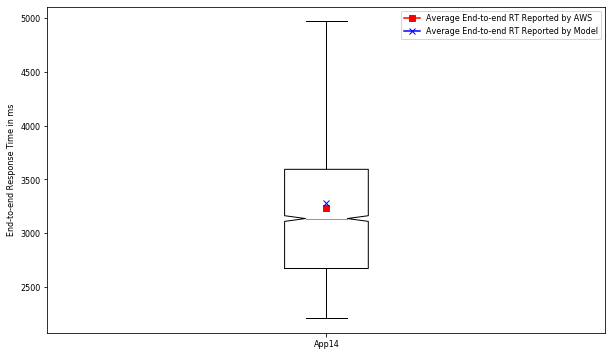

Accuracy of the End-to-end Response Time Modeling:  98.6312651029006


In [65]:
plt.rc('font', size=8)
plt.rc('axes', titlesize=6)
plt.rc('axes', labelsize=8)
fig, ax = plt.subplots(figsize=(10, 6))
App14_ExecutionTime_Bplot = ax.boxplot(App14_duration['Duration'], notch=True, patch_artist=False, labels=['App14'], showfliers=False, showmeans=False)
App14_rt_aws, = ax.plot(np.average(App14_ExecutionTime_Bplot['medians'][0].get_xdata()), np.average(App14_duration['Duration']), color='red', marker='s', markeredgecolor='red')
App14_rt_model, = ax.plot(np.average(App14_ExecutionTime_Bplot['medians'][0].get_xdata()), App14rt, color='blue', marker='x', markeredgecolor='blue')
App14_rt_aws.set_label('Average End-to-end RT Reported by AWS')
App14_rt_model.set_label('Average End-to-end RT Reported by Model')
ax.set_ylabel('End-to-end Response Time in ms')
ax.legend()
plt.show()
print("Accuracy of the End-to-end Response Time Modeling: ", rt_accuracy)

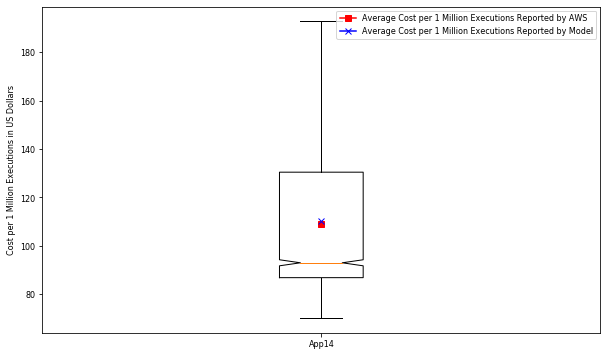

Accuracy of the Cost Modeling:  99.96800013024814


In [66]:
plt.rc('font', size=8)
plt.rc('axes', titlesize=6)
plt.rc('axes', labelsize=8)
fig, ax = plt.subplots(figsize=(10, 6))
App14_Cost_Bplot = ax.boxplot(App14_avg_cost_aws_df['1M_Exe_Cost'], notch=True, patch_artist=False, labels=['App14'], showfliers=False, showmeans=False)
App14_cost_aws, = ax.plot(np.average(App14_Cost_Bplot['medians'][0].get_xdata()), np.average(App14_avg_cost_aws_df['1M_Exe_Cost']), color='red', marker='s', markeredgecolor='red')
App14_cost_model, = ax.plot(np.average(App14_Cost_Bplot['medians'][0].get_xdata()),App14cost, color='blue', marker='x', markeredgecolor='blue')
App14_cost_aws.set_label('Average Cost per 1 Million Executions Reported by AWS')
App14_cost_model.set_label('Average Cost per 1 Million Executions Reported by Model')
ax.set_ylabel('Cost per 1 Million Executions in US Dollars')
ax.legend()
plt.show()
print("Accuracy of the Cost Modeling: ", cost_accuracy)